In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATASET_BASE_FILE_PATH = r"D:\kaggle_competition\birdclef-2023"
TRAIN_SET_FILE_DIR = r"\train_audio"
TEST_SET_FILE_DIR = r"\test_soundscapes"
SAMPLE_SUBMISSION_FILE_PATH = r"\sample_submission.csv"

train_metadata = pd.read_csv(DATASET_BASE_FILE_PATH + r"\train_metadata.csv")
sample_submission = pd.read_csv(DATASET_BASE_FILE_PATH + SAMPLE_SUBMISSION_FILE_PATH)
ebird_taxonomy = pd.read_csv(DATASET_BASE_FILE_PATH + r"\ebird_Taxonomy_v2021.csv")


# Data exploration

In [3]:
train_metadata.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,abethr1/XC128013.ogg
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg


In [4]:
sample_submission.head()

,row_id,abethr1,abhori1,abythr1,afbfly1,afdfly1,afecuc1,affeag1,afgfly1,afghor1,...,yebsto1,yeccan1,yefcan,yelbis1,yenspu1,yertin1,yesbar1,yespet1,yetgre1,yewgre1
0,soundscape_29201_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,soundscape_29201_10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,soundscape_29201_15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ebird_taxonomy.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


## Distribution of Bird Species

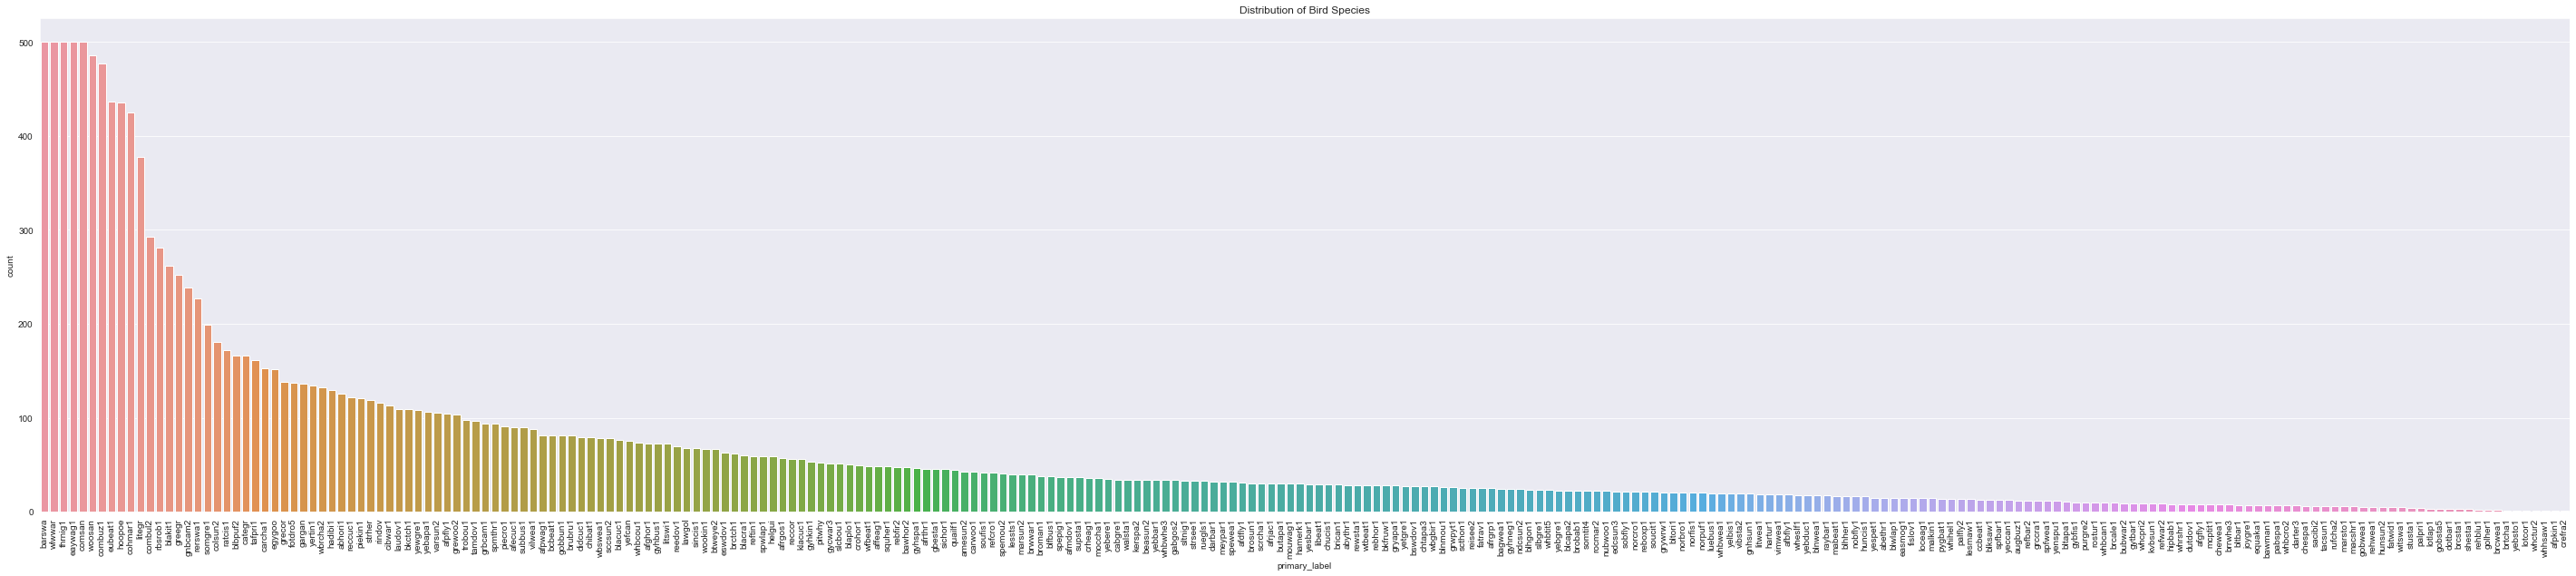

In [9]:
plt.figure(figsize=(50, 10))
sns.countplot(data=train_metadata, x='primary_label', order=train_metadata['primary_label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Bird Species')
plt.show()

## Geographic distribution

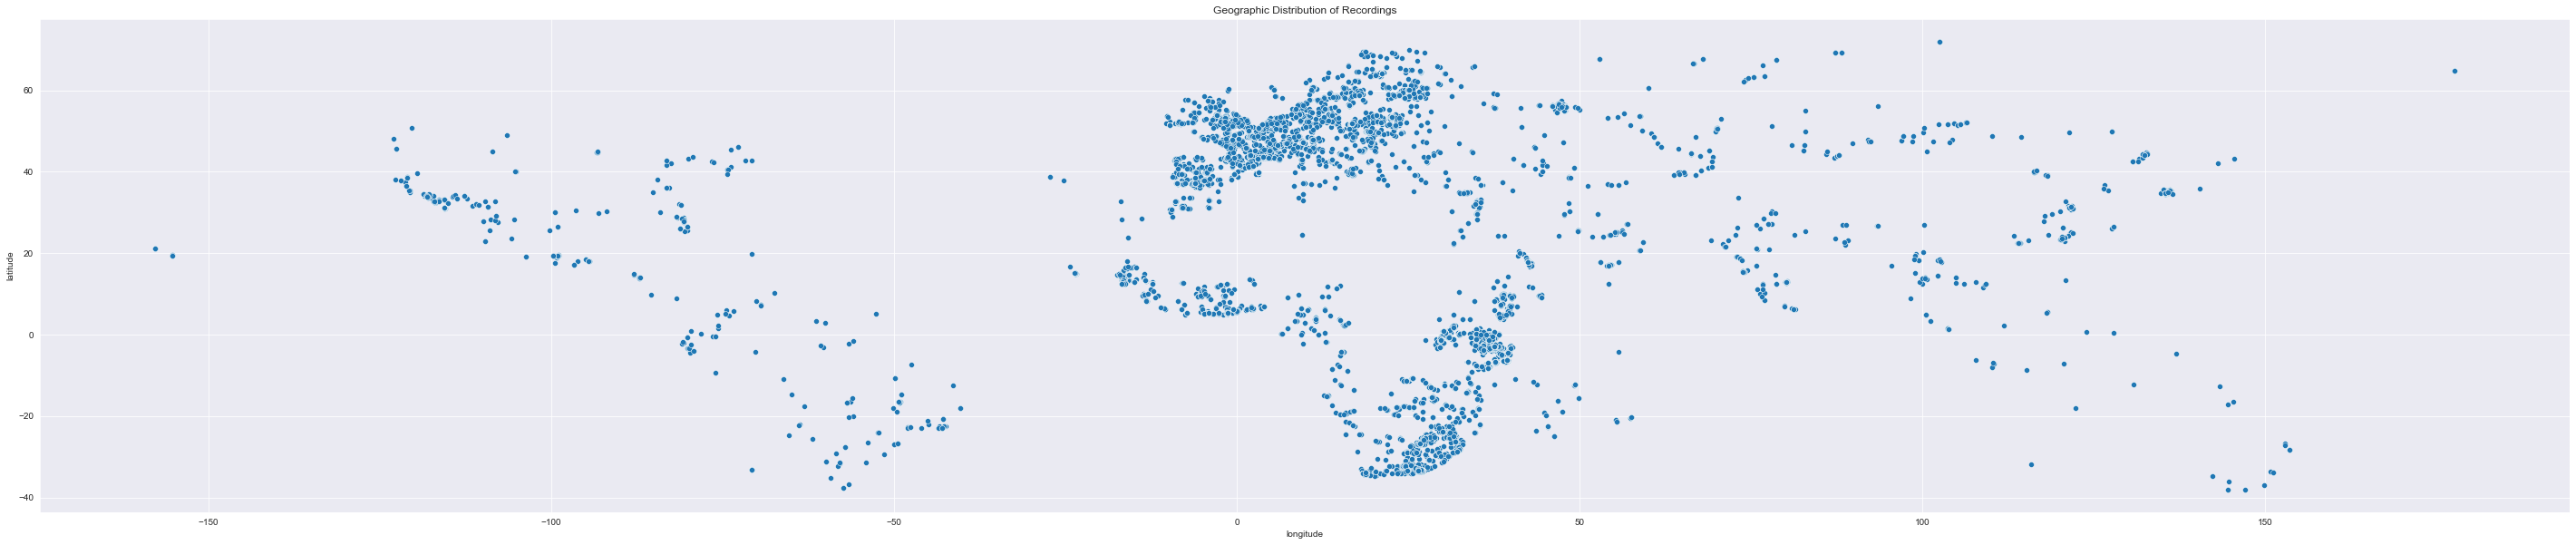

In [10]:
plt.figure(figsize=(50, 10))
sns.scatterplot(data=train_metadata, x='longitude', y='latitude')
plt.title('Geographic Distribution of Recordings')
plt.show()

## Distribution of Recordings by Author

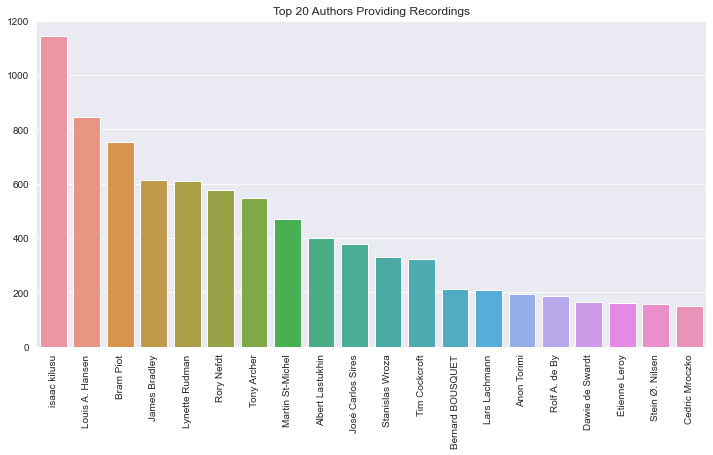

In [11]:
def plot_author_distribution(train_metadata):
    plt.figure(figsize=(12, 6))
    top_authors = train_metadata['author'].value_counts().head(20)
    sns.barplot(x=top_authors.index, y=top_authors.values)
    plt.xticks(rotation=90)
    plt.title('Top 20 Authors Providing Recordings')
    plt.show()

plot_author_distribution(train_metadata)

## Distribution of Recording Ratings

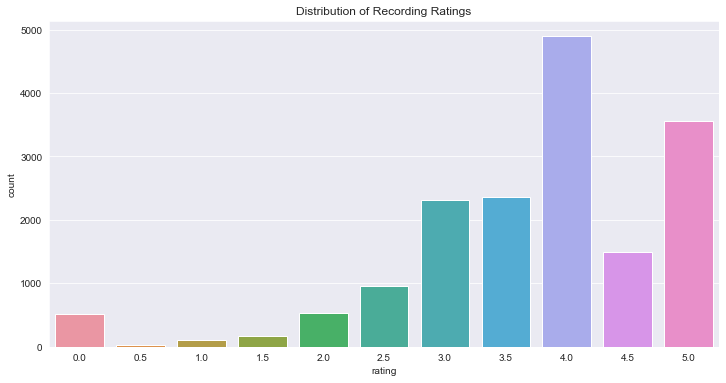

In [12]:
def plot_rating_distribution(train_metadata):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=train_metadata, x='rating')
    plt.title('Distribution of Recording Ratings')
    plt.show()

plot_rating_distribution(train_metadata)

KeyError: 'date'